## Observations and Insights 

In [534]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_data.head(30)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [535]:
# Checking the number of mice.
mouseidcount = combined_data['Mouse ID'].nunique()
f"{mouseidcount} mice"


'249 mice'

In [536]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
miceduplicates = combined_data[combined_data.duplicated(subset = ['Mouse ID', 'Timepoint',])]
miceduplicates.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [537]:
#Checking for duplicated Mouse ID's compared to Timepoint, then creating a new data frame without such data
combined_data['Duplicate'] = combined_data.duplicated(subset = ['Mouse ID', 'Timepoint',])
cleandata = combined_data[combined_data["Duplicate"] == False]
cleandata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [538]:
# Checking the number of mice in the clean DataFrame.
cleandata.nunique()

Mouse ID                249
Drug Regimen             10
Sex                       2
Age_months               24
Weight (g)               16
Timepoint                10
Tumour Volume (mm3)    1640
Metastatic Sites          5
Duplicate                 1
dtype: int64

## Summary Statistics

In [540]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
summarytable=cleandata["Tumour Volume (mm3)"].describe()
summarytable.head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
cleandata_tumour = cleandata.drop(['Mouse ID', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites', 'Duplicate'], axis=1)
cleandata_tumour = cleandata_tumour.groupby(["Drug Regimen"]).describe()
cleandata_tumour.head(14)




Tumour Volume (mm3)                                             \
                           count       mean       std        min        25%   
Drug Regimen                                                                  
Capomulin                  230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                   178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                  178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                   188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                   186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                    181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                   156.0  52.393463  6.568014  45.000000  47.046068   
Ramicane                   228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                   181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                  182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.909965  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [541]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
cleandata_tumour2 = cleandata.groupby(["Drug Regimen"]).aggregate({"Tumour Volume (mm3)":"describe"})
cleandata_tumour2


Tumour Volume (mm3)                                             \
                           count       mean       std        min        25%   
Drug Regimen                                                                  
Capomulin                  230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                   178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                  178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                   188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                   186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                    181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                   156.0  52.393463  6.568014  45.000000  47.046068   
Ramicane                   228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                   181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                  182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.909965  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

## Bar and Pie Charts

In [542]:
#Creating a dataframe that groups the data removing duplicates by drug regimen and counting groups. Dropping unneeded columns
timepointdata = cleandata.groupby("Drug Regimen").count()
timepointdata = timepointdata.drop(['Mouse ID', 'Sex', 'Age_months', 'Weight (g)', "Tumour Volume (mm3)", 'Metastatic Sites', 'Duplicate'], axis=1)

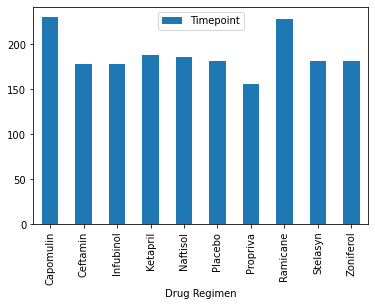

In [544]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepointdata.plot.bar()

Text(0.5, 1.0, 'Drug Regimen vs Timepoint')

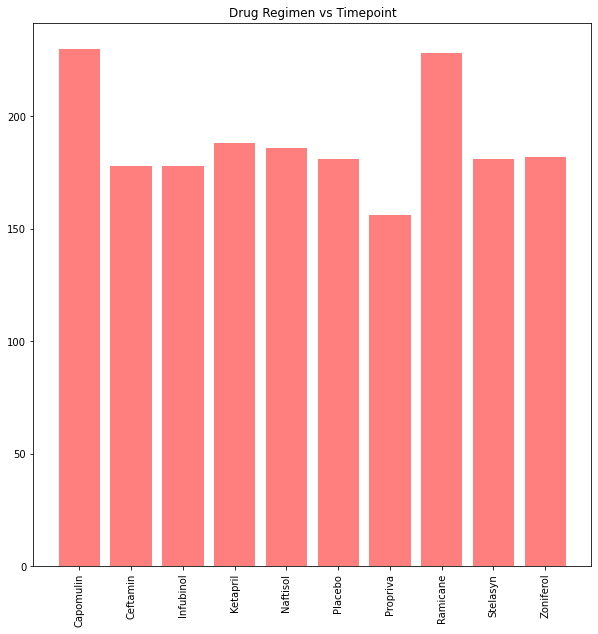

In [545]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(timepointdata))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,10))
plt.bar(x_axis, timepointdata["Timepoint"], color = "r", alpha = 0.5, align = "center")
plt.xticks(tick_locations, timepointdata.index, rotation="vertical")
plt.title("Drug Regimen vs Timepoint")


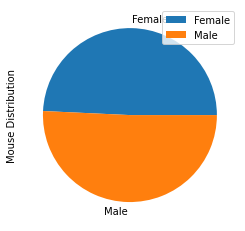

In [546]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexdf = cleandata.groupby("Sex").count()
sexdf = sexdf.drop(['Mouse ID', 'Timepoint', 'Age_months', 'Weight (g)', "Tumour Volume (mm3)", 'Metastatic Sites', 'Duplicate'], axis=1)
sexdf = sexdf.rename(columns={"Drug Regimen":"Mouse Distribution"})
sexdf
sexdf.plot.pie(y = "Mouse Distribution")

([<matplotlib.patches.Wedge at 0x216f0630f08>,
 [Text(0.02562299800632446, 1.099701533132135, 'Female'),
  Text(-0.025623100967812958, -1.099701530733132, 'Male')])

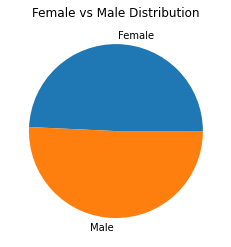

In [547]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Female vs Male Distribution")
plt.pie(sexdf["Mouse Distribution"], labels=sexdf.index)


## Quartiles, Outliers and Boxplots

In [548]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Create dataframe that whitelists Capomulin, Ramicane, Infubinol, and Ceftamin regimens
boxplotdata = cleandata[(cleandata["Drug Regimen"] == "Capomulin") | (cleandata["Drug Regimen"] == "Ramicane") | (cleandata["Drug Regimen"] == "Infubinol") | (cleandata["Drug Regimen"] == "Ceftamin")]
boxplotdata

# Start by getting the last (greatest) timepoint for each mouse
#Create a dataframe to determine max time points for each mouse
Max_Mouse_Timepoint = boxplotdata.groupby("Mouse ID").max()[["Timepoint"]]
Max_Mouse_Timepoint


# # # Merge this group df with the original dataframe to get the tumour volume at the last timepoint

#Merging Max timepoint data frame with rest of data then finding matching timepoints to find the max timepoint compared to the rest of the data (including Tumour volume), drop extra timepoint and rename remaining time point
final_tumour_volume = pd.merge(Max_Mouse_Timepoint, boxplotdata, how="left", on=["Mouse ID", "Mouse ID"])
final_tumour_volume = final_tumour_volume[(final_tumour_volume["Timepoint_x"] == (final_tumour_volume["Timepoint_y"]))]
final_tumour_volume = final_tumour_volume.drop("Timepoint_x", axis=1)
final_tumour_volume = final_tumour_volume.rename(columns={"Timepoint_y": "Timepoint"})
final_tumour_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,Duplicate
9,a203,Infubinol,Female,20,23,45,67.973419,2,False
19,a251,Infubinol,Female,21,25,45,65.525743,1,False
29,a275,Ceftamin,Female,20,28,45,62.999356,3,False
39,a411,Ramicane,Male,3,22,45,38.407618,1,False
49,a444,Ramicane,Female,10,25,45,43.047543,0,False
...,...,...,...,...,...,...,...,...,...
773,y769,Ceftamin,Female,6,27,45,68.594745,4,False
783,y793,Capomulin,Male,17,17,45,31.896238,2,False
793,y865,Ceftamin,Male,23,26,45,64.729837,3,False
803,z578,Ramicane,Male,11,16,45,30.638696,0,False


In [549]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = boxplotdata["Drug Regimen"].unique().tolist()
treatments

# Create empty list to fill with tumour vol data (for plotting)
tumorvol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#For loop that finds IQR by Drug Regimen and appends results to tumorvol list
for treatment in treatments:
    box_plot_data_by_treatment=boxplotdata[boxplotdata["Drug Regimen"] == treatment]
    q75, q25, q50 = np.percentile(box_plot_data_by_treatment["Tumour Volume (mm3)"], [75 ,25, 50])
    iqr = q75 - q25
    tumorvol_data.append([treatment, q25, q50, q75, iqr, box_plot_data_by_treatment])


    # Locate the rows which contain mice on each drug and get the tumour volumes
    # Determine outliers using upper and lower bounds

#For loop that uses tumorvol_data to create seperate data frames for each regimen's outliers in an array
for treatment_dataset in tumorvol_data:
    bigoutlier = treatment_dataset[5]["Tumour Volume (mm3)"] > treatment_dataset[3] + treatment_dataset[4]*1.5
    smalloutlier = treatment_dataset[5]["Tumour Volume (mm3)"] < treatment_dataset[1] - treatment_dataset[4]*1.5
    outlier = [a or b for a, b in zip(bigoutlier, smalloutlier)]
    print(treatment_dataset[5][outlier])
 

    

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
9     k403     Ramicane  Male          21          16         45   

   Tumour Volume (mm3)  Metastatic Sites  Duplicate  
9            22.050126                 1      False  
   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumour Volume (mm3)  Metastatic Sites  Duplicate  
18            25.472143                 1      False  
19            23.343598                 1      False  
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumour Volume (mm3), Metastatic Sites, Duplicate]
Index: []
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumour Volume (mm3), Metastatic Sites, Duplicate]
Index: []


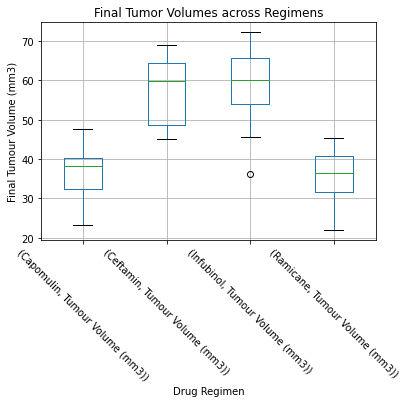

In [551]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
#Create and label box plot
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volumes across Regimens")
ax1.set_ylabel("Final Tumour Volume (mm3)")
ax1.set_xlabel("Drug Regimen")

#Drop unnecesarry columns rotate labels
final_tumour_volume.drop(["Mouse ID", "Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites", "Duplicate"], axis=1).groupby("Drug Regimen").boxplot(final_tumour_volume["Tumour Volume (mm3)"])
plt.xticks(rotation = -45)
plt.show()


## Line and Scatter Plots

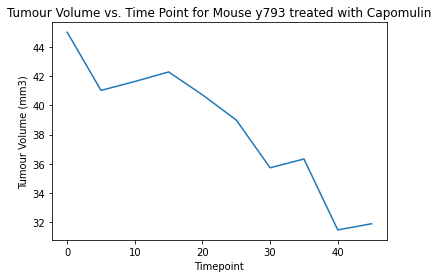

In [552]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

#Create a dataframe for tumor volume and timepoint for mouse y793
mouse = boxplotdata[boxplotdata["Mouse ID"] =="y793"][["Timepoint", "Tumour Volume (mm3)"]]
mouse.head()

#Line plot tumorvolume/timepoint dataframe
plt.title("Tumour Volume vs. Time Point for Mouse y793 treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")
plt.plot(mouse["Timepoint"], mouse["Tumour Volume (mm3)"])



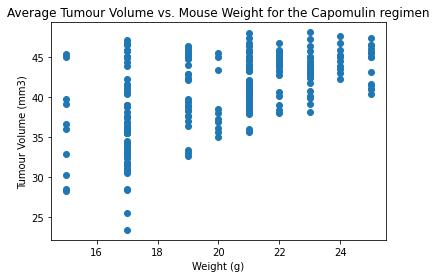

In [553]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

#Create dataframe for Capomulin
capomulin_data = boxplotdata[boxplotdata["Drug Regimen"] == "Capomulin"]
capomulin_data

#Create scatter plot out of Capomulin dataframe
x_axis = capomulin_data["Weight (g)"]
y_axis = capomulin_data["Tumour Volume (mm3)"]
plt.title("Average Tumour Volume vs. Mouse Weight for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumour Volume (mm3)")
plt.scatter(x_axis, y_axis)



## Correlation and Regression

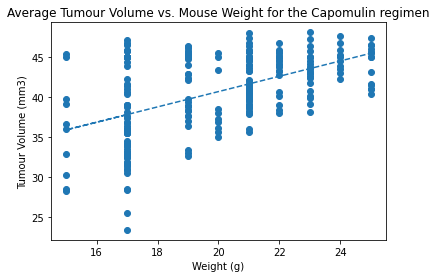

In [554]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

#Create correlation coefficient dataframe out of Capomulin dataframe
capomulin_data.corr()["Tumour Volume (mm3)"]["Weight (g)"] 
x_axis = capomulin_data["Weight (g)"]
y_axis = capomulin_data["Tumour Volume (mm3)"]

#Calculate linear regression model and apply to scatter plot
slope, int, r, p, std_err = st.linregress(x_axis, y_axis)
line=slope*x_axis+int
plt.title("Average Tumour Volume vs. Mouse Weight for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumour Volume (mm3)")
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, line, "--")
